<a href="https://colab.research.google.com/github/HilalSolak/Multilayer-Perceptron_cure_the_princess/blob/main/Questin5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class PrincessDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.X = data.iloc[:, :-1].values
        self.y = data.iloc[:, -1].values

        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = torch.FloatTensor(self.X[idx])
        y = torch.LongTensor([self.y[idx]])
        return X, y

# Load data
train_data = pd.read_csv('/content/cvsdosyaları/cure_the_princess_train.csv')
val_data = pd.read_csv('/content/cvsdosyaları/cure_the_princess_validation.csv')
test_data = pd.read_csv('/content/cvsdosyaları/cure_the_princess_test.csv')

# Create datasets
train_dataset = PrincessDataset(train_data)
val_dataset = PrincessDataset(val_data)
test_dataset = PrincessDataset(test_data)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

# Hyperparameters
input_dim = 13
hidden_dim1 = 100
hidden_dim2 = 50
output_dim = 14
lr = 0.01
epochs = 25
batch_size = 16

# Define MLP model
model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.squeeze())
        loss.backward()
        optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target.squeeze()).sum().item()
    
    accuracy = 100 * correct / total
    print('Epoch: {}, Validation Accuracy: {:.2f}%'.format(epoch+1, accuracy))


Epoch: 1, Validation Accuracy: 62.10%
Epoch: 2, Validation Accuracy: 67.52%
Epoch: 3, Validation Accuracy: 74.84%
Epoch: 4, Validation Accuracy: 77.71%
Epoch: 5, Validation Accuracy: 79.94%
Epoch: 6, Validation Accuracy: 84.39%
Epoch: 7, Validation Accuracy: 84.08%
Epoch: 8, Validation Accuracy: 87.90%
Epoch: 9, Validation Accuracy: 90.76%
Epoch: 10, Validation Accuracy: 92.04%
Epoch: 11, Validation Accuracy: 92.04%
Epoch: 12, Validation Accuracy: 92.99%
Epoch: 13, Validation Accuracy: 93.63%
Epoch: 14, Validation Accuracy: 93.95%
Epoch: 15, Validation Accuracy: 93.63%
Epoch: 16, Validation Accuracy: 92.99%
Epoch: 17, Validation Accuracy: 93.31%
Epoch: 18, Validation Accuracy: 93.95%
Epoch: 19, Validation Accuracy: 92.99%
Epoch: 20, Validation Accuracy: 93.95%
Epoch: 21, Validation Accuracy: 93.63%
Epoch: 22, Validation Accuracy: 93.63%
Epoch: 23, Validation Accuracy: 93.95%
Epoch: 24, Validation Accuracy: 93.95%
Epoch: 25, Validation Accuracy: 93.95%


Epoch: 1, Validation Accuracy: 93.95%
Epoch: 2, Validation Accuracy: 94.27%
Epoch: 3, Validation Accuracy: 93.95%
Epoch: 4, Validation Accuracy: 94.59%
Epoch: 5, Validation Accuracy: 94.27%
Epoch: 6, Validation Accuracy: 94.27%
Epoch: 7, Validation Accuracy: 93.95%
Epoch: 8, Validation Accuracy: 93.95%
Epoch: 9, Validation Accuracy: 94.27%
Epoch: 10, Validation Accuracy: 93.63%
Epoch: 11, Validation Accuracy: 94.27%
Epoch: 12, Validation Accuracy: 93.95%
Epoch: 13, Validation Accuracy: 95.54%
Epoch: 14, Validation Accuracy: 94.59%
Epoch: 15, Validation Accuracy: 94.59%
Epoch: 16, Validation Accuracy: 93.95%
Epoch: 17, Validation Accuracy: 94.27%
Epoch: 18, Validation Accuracy: 94.27%
Epoch: 19, Validation Accuracy: 94.59%
Epoch: 20, Validation Accuracy: 93.95%
Epoch: 21, Validation Accuracy: 94.27%
Epoch: 22, Validation Accuracy: 94.27%
Epoch: 23, Validation Accuracy: 94.59%
Epoch: 24, Validation Accuracy: 94.90%
Epoch: 25, Validation Accuracy: 94.90%


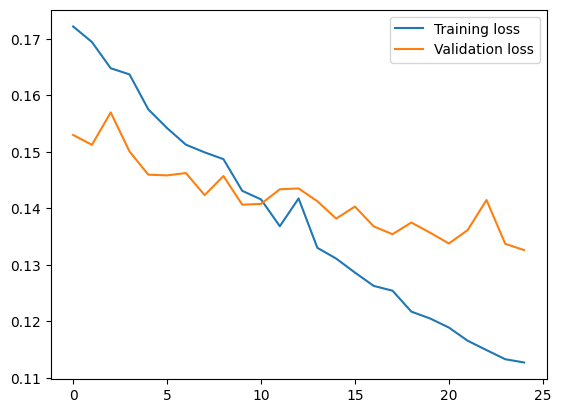

In [ ]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss/len(train_loader))

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output, target.squeeze())
            val_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target.squeeze()).sum().item()
        val_losses.append(val_loss/len(val_loader))
    
    accuracy = 100 * correct / total
    print('Epoch: {}, Validation Accuracy: {:.2f}%'.format(epoch+1, accuracy))

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()